<a href="https://colab.research.google.com/github/Nishan-Charlie/SkinCancer/blob/main/Fixmatch_ISIC_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-b19a4251-2e08-be82-a811-55d411261b35)


### configs

In [2]:
NAME = "NishankarS" #your name here
PROJECT_NAME = "Fixmatch_Multiclass_Implementation"
MODEL_TYPE = "Semi-Supervised Learning"
ARCHITECTURE_NAME = "resnet50"


## Install dependency

In [3]:
!pip install -q timm
!pip install -q  --upgrade wandb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 56.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.8/20.8 MB 85.4 MB/s eta 0:00:00


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Download Kaggle Dataset and Dataframe create**

In [6]:
import os
import pandas as pd
import numpy as np
from imutils import paths
from google.colab import files
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt



**Dataframe Shuffle and Split**

In [47]:
df_train = pd.read_csv("/content/drive/MyDrive/Research/Skin/ISIC_2019_Training_GroundTruth.csv")
# df_train['label'] = df_train.iloc[:, 1:].idxmax(axis=1)
df = shuffle(df_train)
ulb_dataframe , lb_dataframe = train_test_split(df,test_size = 0.2)
lb_dataframe = shuffle(lb_dataframe)
lb_dataframe, valid_dataframe = train_test_split(lb_dataframe,test_size = 0.2)
print(len(ulb_dataframe))
print(len(lb_dataframe))
print(len(valid_dataframe))

20264
4053
1014


In [48]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25331 entries, 0 to 25330
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   image   25331 non-null  object 
 1   MEL     25331 non-null  float64
 2   NV      25331 non-null  float64
 3   BCC     25331 non-null  float64
 4   AK      25331 non-null  float64
 5   BKL     25331 non-null  float64
 6   DF      25331 non-null  float64
 7   VASC    25331 non-null  float64
 8   SCC     25331 non-null  float64
 9   UNK     25331 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.9+ MB


In [49]:
df_train.drop('UNK',axis='columns', inplace=True)

In [50]:
df_train.head()

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


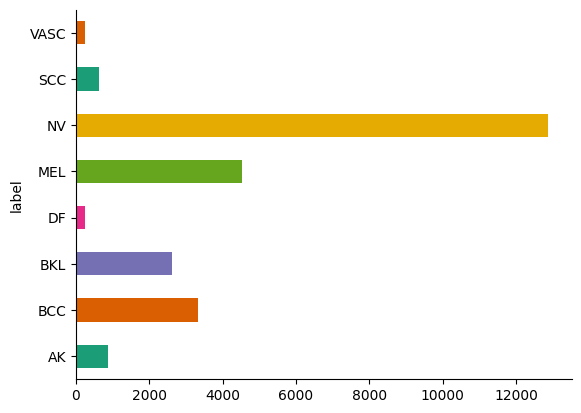

In [51]:
df_graph = df_train.copy()  # Create a copy of df_train to avoid modification
df_graph['label'] = df_graph.iloc[:, 1:].idxmax(axis=1)  # Assign the label column

# Plotting
df_graph.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

In [52]:
label_encoding = {
    'MEL': 0,
    'NV': 1,
    'BCC': 2,
    'AK': 3,
    'BKL': 4,
    'DF': 5,
    'VASC': 6,
    'SCC': 7,

}


## **Useful imports**

In [37]:
import pandas as pd
import numpy as np
import cv2

import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
import torch.optim as optim

import torchvision
from torchvision import transforms

from tqdm.notebook import tqdm

from sklearn.metrics import accuracy_score
from timm.data.auto_augment import rand_augment_transform
import PIL
import matplotlib.pyplot as plt

import timm
import time
from collections import OrderedDict

import wandb

**Variables**

In [38]:
# device is set to cuda if cuda is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
num_epochs = 10
total_class = 8
threshold = 0.90
learning_rate = 0.001
lb_to_ulb_ratio = 4
batch_size_lb = 6
save_path_checkpoints= "/content/drive/MyDrive/Research/Skin/model/ckpts"
os.makedirs(save_path_checkpoints, exist_ok=True)

**Dataset Class**

In [53]:
class ImageDataset(Dataset):
    def __init__(self, dataframe,weak_transform,strong_transform,normalize,is_lb=False):
        self.dataframe = dataframe
        self.weak_transform = weak_transform
        self.strong_transform = strong_transform
        self.normalize = normalize
        self.is_lb = is_lb
        self.all_image_names = self.dataframe.iloc[:]['image']
        # image_name = self.dataframe.iloc[:]['image']
        self.dataframe['label'] = self.dataframe.iloc[:, 1:].idxmax(axis=1)
        self.all_image_label = self.dataframe['label'].map(label_encoding)

    def __len__(self):
        return len(self.all_image_names)

    def __getitem__(self, index):
        img_path = os.path.join("/content/drive/MyDrive/Research/Skin/ISIC_2019_Training_Input", self.all_image_names.iloc[index]+".jpg")
        image = PIL.Image.open(img_path)
        if self.is_lb == True:
          return self.normalize(image),int(self.all_image_label.iloc[index])
        else:
          weak_image = self.weak_transform(image)
          strong_image = self.strong_transform(image)
          return self.normalize(weak_image),self.normalize(strong_image)


**Dataloader and Transfrom**

In [54]:
def fun_transfrom():
  strong_transform =  rand_augment_transform(
    config_str='rand-m9-mstd0.5',
    hparams={}
              )

  weak_transform = transforms.Compose([transforms.RandomHorizontalFlip()])

  normalize = transforms.Compose([
            transforms.Resize((224,224)),
            transforms.ToTensor(),
            transforms.Normalize(mean=mean, std=std)])

  ulb_dataset = ImageDataset(
      ulb_dataframe,
      weak_transform,
      strong_transform,
      normalize,
      is_lb=False
  )

  lb_dataset = ImageDataset(
      lb_dataframe,
      weak_transform,
      strong_transform,
      normalize,
      is_lb=True
  )

  valid_dataset = ImageDataset(
      valid_dataframe,
      weak_transform,
      strong_transform,
      normalize,
      is_lb=True
  )

  dataloader_ulb_dataset = DataLoader(ulb_dataset, batch_size=batch_size_lb * lb_to_ulb_ratio, shuffle=True, num_workers=2)
  dataloader_lb_dataset = DataLoader(lb_dataset, batch_size=batch_size_lb, shuffle=True, num_workers=2)
  dataloader_valid_dataset = DataLoader(valid_dataset, batch_size=20, shuffle=False, num_workers=2)

  return dataloader_ulb_dataset,dataloader_lb_dataset,dataloader_valid_dataset


dataloader_ulb_dataset,dataloader_lb_dataset,dataloader_valid_dataset = fun_transfrom()

**Wandb**

In [41]:
!wandb login

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: nishannishankar (nishannishankar-university-of-jaffna) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


In [42]:
import wandb

class WandbLogger():
    """
    This custom callback is used for logging training metrics to wandb for monitoring.
    """
    def __init__(self, project, entity, name, id, config, resume="allow"):
        self.project = project
        self.entity = entity
        self.name = name
        self.id = id
        self.config = config
        self.resume = resume

        # Set a longer initialization timeout
        settings = wandb.Settings(init_timeout=120)

        # Initialize W&B with settings
        wandb.init(
            project=self.project,
            entity=self.entity,
            name=self.name,
            id=self.id,
            config=self.config,
            resume=self.resume,
            settings=settings  # ✅ Pass settings here
        )


In [43]:
project= PROJECT_NAME
entity = "nishannishankar-university-of-jaffna"



name = f"{PROJECT_NAME}_{ARCHITECTURE_NAME}" #same name for multiple run is allowed but same id is not allowed
id = f"{PROJECT_NAME}_{ARCHITECTURE_NAME}"

wandb_config = {"network":ARCHITECTURE_NAME,
                "epoch":num_epochs,
                "batch_size_lb": batch_size_lb,
                "lb_to_ulb_ratio":lb_to_ulb_ratio,
                "learning_rate": learning_rate,
                "probability_threshold": threshold,
                }
wandb_logger = WandbLogger(project,entity,name,id,wandb_config)

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: nishannishankar (nishannishankar-university-of-jaffna) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


# Model Define

In [55]:
model = timm.create_model('resnet50', pretrained=True)

# Modify the classifier (ResNet50 uses 'fc' instead of 'classifier')
classifier = nn.Sequential(OrderedDict([
    ('fc1', nn.Linear(model.fc.in_features, total_class))  # Use 'fc' instead of 'classifier'
]))

# Replace the original fully connected layer
model.fc = classifier
# Move model to device
model = model.to(device)

# Define optimizer
optimizer = optim.AdamW(model.parameters(), lr=learning_rate)

In [56]:
def train_fixMatch(threshold):

    model.train()

    losses = []
    pbar = tqdm(dataloader_lb_dataset)
    ulb_iter = iter(dataloader_ulb_dataset)

    for batch_lb in pbar:
        model.zero_grad()
        # labelled data
        x_lb, y = batch_lb
        x_lb, y = x_lb.to(device), y.to(device)
        # unlabelled data
        try:
            x_weak, x_strong = next(ulb_iter)
        except StopIteration:
            ulb_iter = iter(dataloader_ulb_dataset)
            x_weak, x_strong = next(ulb_iter)

        x_weak, x_strong = x_weak.to(device), x_strong.to(device)

        # concat all x
        all_x = torch.cat([x_lb, x_weak, x_strong], dim=0)

        # compute logits
        all_logits = model(all_x)

        # logits and loss for labelled data
        logits_lb = all_logits[:x_lb.size(0)]

        loss_lb = F.cross_entropy(logits_lb, y)

        # logits for unlabelled data
        logits_ulb = all_logits[x_lb.size(0):]
        logits_weak, logits_strong = torch.chunk(logits_ulb, 2, dim=0)

        # stop gradient for weak augmented
        logits_weak = logits_weak.detach()

        # compute class probailities
        probs_weak = F.softmax(logits_weak, dim=1)

        # compute pseudo labels (torch.max outputs the maximum values and the argmax)
        max_prob, pseudo_label = torch.max(probs_weak, dim=1)

        # mask for
        mask = (max_prob > threshold).float() # [1, 0] [batch_size,]

        # mask non-confident prediction
        pseudo_label = pseudo_label.masked_fill(mask == 0, 0) # [3, -1, ...]

        # unsupervised loss by ignoring non-confident prediction
        loss_ulb = F.cross_entropy(logits_strong, pseudo_label, ignore_index=-1)

        # total loss
        loss = loss_lb + loss_ulb
        loss.backward()

        optimizer.step()

        loss_item = loss.item()
        losses.append(loss_item)

        pbar.set_description(f'train loss = {np.array(losses).mean(): .3f}')
    return np.array(losses).mean()

@torch.no_grad()
def validate():

    model.eval()

    labels_all = []
    logits_all = []


    for x, y in dataloader_valid_dataset:

        x, y = x.to(device), y.to(device)

        logits = model(x)

        labels_all += y.cpu().numpy().tolist()
        logits_all += logits.cpu().numpy().tolist()

    prediction = np.argmax(np.array(logits_all), axis=-1)

    acc = accuracy_score(labels_all, prediction)

    return acc

In [ ]:
losses = []
accuracies = []
for epoch in range(num_epochs):
    train_loss = train_fixMatch(threshold=0.9)
    val_acc= validate()
    losses.append(train_loss)
    accuracies.append(val_acc)
    print("validation accuracy-{}".format(val_acc))
    wandb.log({ "train_loss": train_loss,
                 "valid_acc":val_acc})
    filepath=f"{save_path_checkpoints}/{PROJECT_NAME}_{MODEL_TYPE}-{ARCHITECTURE_NAME}-{epoch+1}_loss-{train_loss}.pt"
    checkpoint= {
                    "epoch" : epoch+1 ,
                    "model_weight" : model.state_dict(),
                    "optimizer_state" : optimizer.state_dict()
                }
    torch.save(checkpoint,filepath)
    print("{} saved".format(filepath))


  0%|          | 0/676 [00:00<?, ?it/s]

In [ ]:
plt.plot(np.arange(num_epochs), losses)
plt.title('traning Loss Vs epoch')
plt.xlabel('epoch')
plt.ylabel('traning Loss')
plt.show()

In [ ]:
plt.plot(np.arange(num_epochs), accuracies)
plt.title('Validation accuracy Vs epoch')
plt.xlabel('epoch')
plt.ylabel('validation accuracy')
plt.show()

In [ ]:
@torch.no_grad()
def validate():

    model.eval()

    labels_all = []
    logits_all = []


    for x, y in dataloader_valid_dataset:

        x, y = x.to(device), y.to(device)

        logits = model(x)

        labels_all += y.cpu().numpy().tolist()
        logits_all += logits.cpu().numpy().tolist()

    prediction = np.argmax(np.array(logits_all), axis=-1)

    acc = accuracy_score(labels_all, prediction)

    return acc

In [ ]:
import glob
acc = []
for num,path in enumerate(sorted(glob.glob("/content/model/ckpts/*"))):
  checkpoint = torch.load(path)
  model.load_state_dict(checkpoint['model_weight'])
  acc_valid  = validate()
  acc.append(acc_valid)
  #print(path)

sorted(glob.glob("/content/model/ckpts/*"))[np.argmax(acc)]

print("###")
model.load_state_dict(torch.load(sorted(glob.glob("/content/model/ckpts/*"))[np.argmax(acc)])["model_weight"])
acc_valid  = validate()

wandb.log({ "Test_acc":acc_valid})

wandb.finish()